<a href="https://colab.research.google.com/github/PHSX-bond/218-PHSX-_25/blob/main/Lenses_and_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

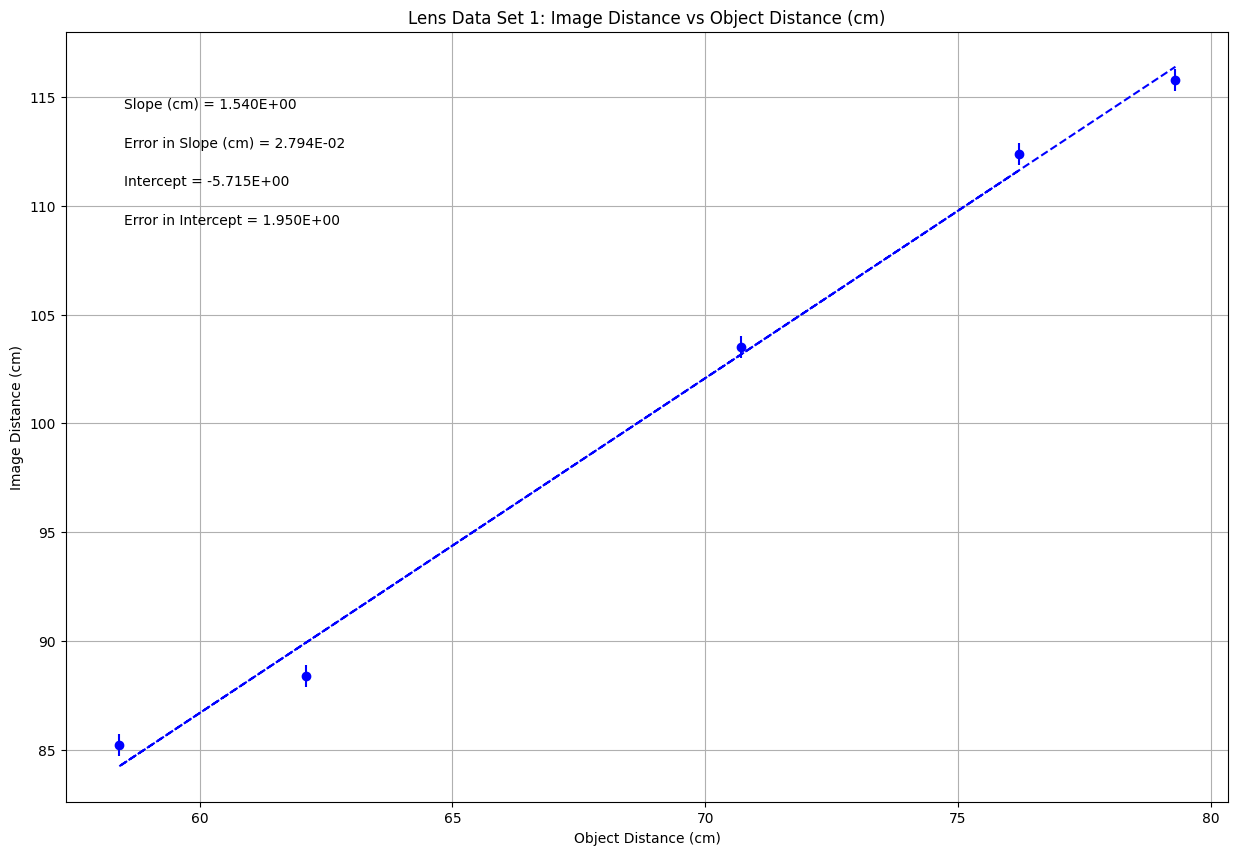

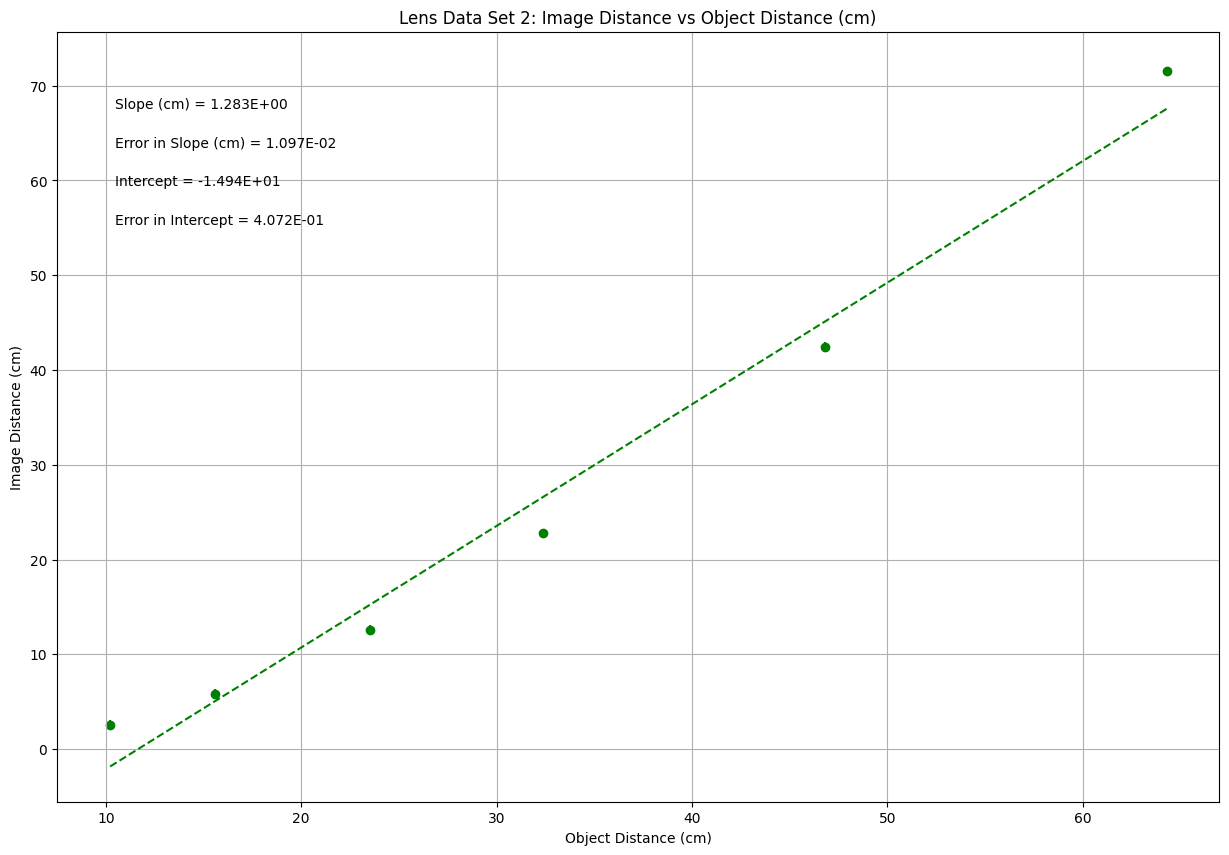

In [7]:
# PHSX 216 & 218 plotting code - Lens Lab (in cm)
# Brianna Beller, Updated April 2025

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Dataset 1: do vs di (in cm)
x1 = np.array([76.2, 58.4, 62.1, 70.7, 79.3])       # object distances (cm)
y1 = np.array([112.4, 85.2, 88.4, 103.5, 115.8])    # image distances (cm)
dy1 = np.array([0.5, 0.5, 0.5, 0.5, 0.5])           # error in y (cm)

# Dataset 2: do vs di (in cm)
x2 = np.array([64.3, 46.8, 32.4, 23.5, 15.6, 10.2])  # object distances (cm)
y2 = np.array([71.5, 42.435, 22.763, 12.616, 5.859, 2.537])  # image distances (cm)
dy2 = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])               # error in y (cm)

# --------------------------
# Functions for fitting and plotting

def Delta(x, dy):
    return (sum(1/dy**2)) * (sum(x**2/dy**2)) - (sum(x/dy**2))**2

def LLSFD2(x, y, dy, b, m):
    return sum(((y - b - m*x)/dy)**2)

def analyze_and_plot(x, y, dy, title, color, slope_units='cm', annotation_placement=2):
    # Linear fit with weights
    b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)
    fit = b + m * x

    # Error in slope and intercept
    D = Delta(x, dy)
    dm = np.sqrt(1/D * sum(1/dy**2))
    db = np.sqrt(1/D * sum(x**2/dy**2))

    # Goodness of fit
    N = LLSFD2(x, y, dy, b, m)

    # Annotation placement
    if annotation_placement in [2, 3]:
        xpos = 0.05
    else:
        xpos = 0.75
    if annotation_placement in [1, 2]:
        ypos = [0.9, 0.85, 0.8, 0.75]
    else:
        ypos = [0.2, 0.15, 0.1, 0.05]

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(x, fit, color=color, linestyle='--')
    plt.scatter(x, y, color=color, marker='o')
    plt.errorbar(x, y, yerr=dy, fmt='none', ecolor=color)

    plt.xlabel('Object Distance (cm)')
    plt.ylabel('Image Distance (cm)')
    plt.title(title)

    plt.annotate('Slope ({}) = {:.3E}'.format(slope_units, m), (xpos, ypos[0]), xycoords='axes fraction')
    plt.annotate('Error in Slope ({}) = {:.3E}'.format(slope_units, dm), (xpos, ypos[1]), xycoords='axes fraction')
    plt.annotate('Intercept = {:.3E}'.format(b), (xpos, ypos[2]), xycoords='axes fraction')
    plt.annotate('Error in Intercept = {:.3E}'.format(db), (xpos, ypos[3]), xycoords='axes fraction')

    plt.grid(True)
    plt.show()

# --------------------------
# Plot both datasets

analyze_and_plot(x1, y1, dy1,
                 title='Lens Data Set 1: Image Distance vs Object Distance (cm)',
                 color='blue')

analyze_and_plot(x2, y2, dy2,
                 title='Lens Data Set 2: Image Distance vs Object Distance (cm)',
                 color='green')

